## Linear Regression

In [1]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
m=100
X = 2*np.random.rand(m,1)
y = 4 + 3 * X + np.random.randn(m, 1)


In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size =15)
plt.rc('axes', labelsize= 15)
plt.rc('legend', fontsize= 15)
plt.rc('xtick', labelsize= 15)
plt.rc('ytick', labelsize= 15)

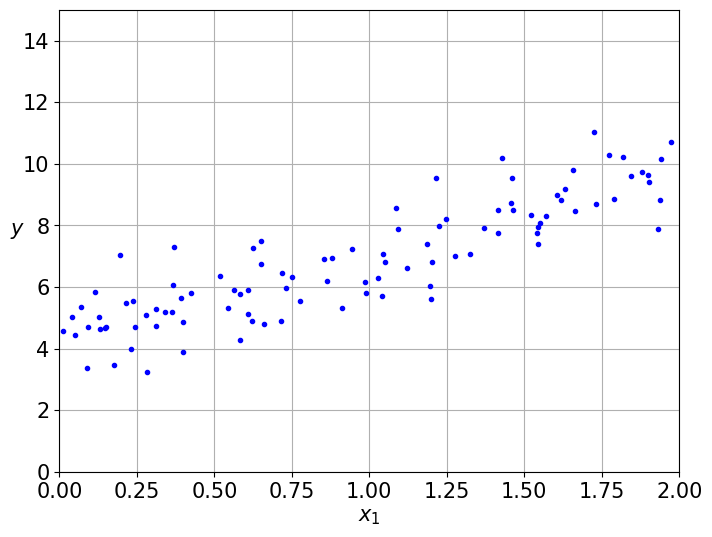

In [3]:
plt.figure(figsize=(8,6))
plt.plot(X,y ,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.show()

In [5]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)  
best_theta = np.linalg.inv(X_b.T@X_b)@X_b.T@y
print(best_theta)

[[4.21509616]
 [2.77011339]]


In [12]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict =X_new_b@best_theta

y_predict

array([[4.21509616],
       [9.75532293]])

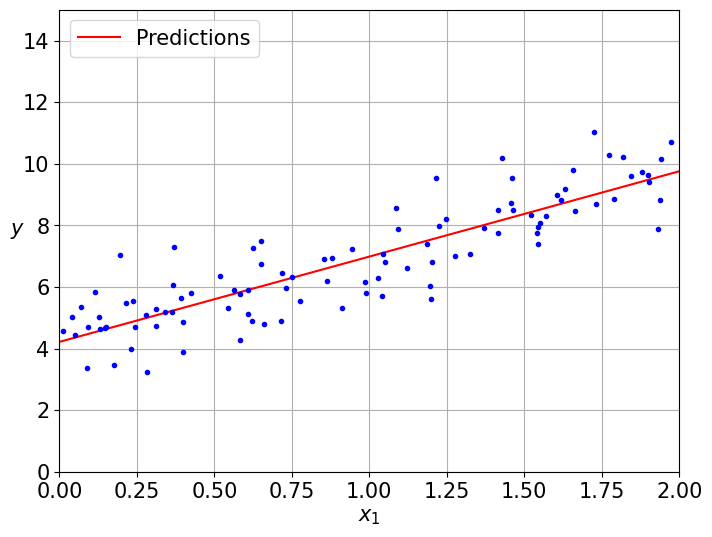

In [16]:
plt.figure(figsize=(8,6))
plt.plot(X_new, y_predict, 'r-', label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.legend(loc="upper left")

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_predict = lin_reg.predict(X_new)
lin_predict

array([[4.21509616],
       [9.75532293]])

In [18]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [ ]:
residuals ## the lower the better

array([80.6584564])

In [ ]:
rank ## number of independent features

np.int32(2)